In [1]:
import pandas as pd
from matplotlib import pyplot
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel(r'C:\Users\hp\Downloads\Airlines+Data.xlsx')
df                   

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [3]:
#Converting the 'Month' column into proper date time format
dates = pd.date_range(start='1995-01-01', freq='MS',periods=len(df))

In [4]:
df['Month'] = dates.month
df['Year'] = dates.year

In [5]:
df.head()

,Month,Passengers,Year
0,1,112,1995
1,2,118,1995
2,3,132,1995
3,4,129,1995
4,5,121,1995


In [6]:
#To get the names of the month
df.dtypes

Month         int64
Passengers    int64
Year          int64
dtype: object

In [7]:
import calendar
df['Month'] = df['Month'].apply(lambda x: calendar.month_abbr[x])
#df.rename({'#Passengers':'Passengers'},axis=1,inplace=True)
df = df[['Month','Year','Passengers']]
df.head()

,Month,Year,Passengers
0,Jan,1995,112
1,Feb,1995,118
2,Mar,1995,132
3,Apr,1995,129
4,May,1995,121


In [8]:
df['Date'] = dates
df.set_index('Date',inplace=True)

In [9]:
ddf=df
ddf.head()

,Month,Year,Passengers
Date,,,
1995-01-01,Jan,1995,112
1995-02-01,Feb,1995,118
1995-03-01,Mar,1995,132
1995-04-01,Apr,1995,129
1995-05-01,May,1995,121


# Exploratory Data Analysis

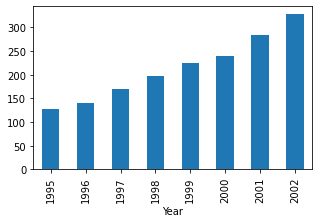

In [10]:
plt.figure(figsize=(5,3))
ddf.groupby('Year')['Passengers'].mean().plot(kind='bar')
plt.show()

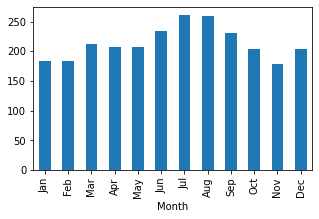

In [11]:
plt.figure(figsize=(5,3))
ddf.groupby('Month')['Passengers'].mean().reindex(index=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']).plot(kind='bar')
plt.show()

# Trend and Seasonality

In [12]:
passengers_count = ddf['Passengers']

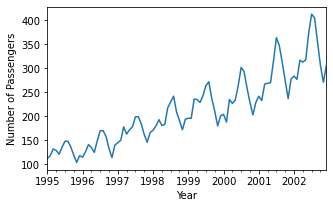

In [13]:
plt.figure(figsize=(5,3))
passengers_count.plot()
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.show()

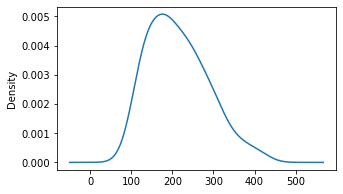

In [14]:
# create a density plot
plt.figure(figsize=(5,3))
passengers_count.plot(kind='kde')
pyplot.show()

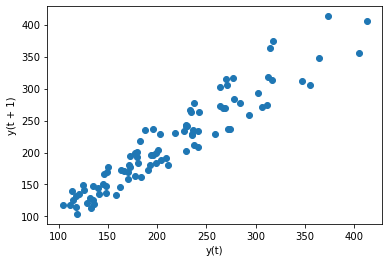

In [15]:
# create a lag plot y(t+1)
from pandas.plotting import lag_plot
lag_plot(passengers_count)
pyplot.show()

# Autocorrelation plot

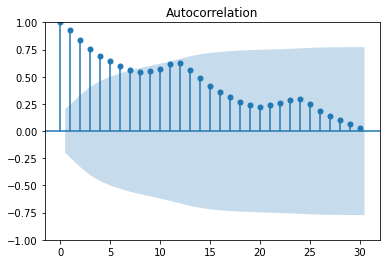

In [16]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(passengers_count,lags=30)
pyplot.show()

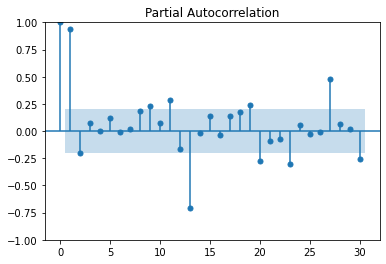

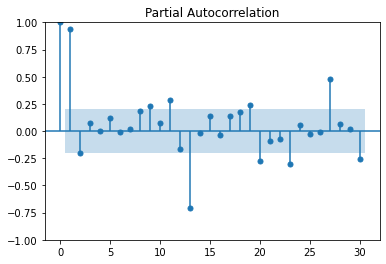

In [17]:
# Pacf plot
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(passengers_count,lags=30)

# Time series decomposition of data
To understand underlying patterns such as trend, seasonality, cycle and irregular remainder.

In [18]:
decompose = sm.tsa.seasonal_decompose(passengers_count,model='multiplicative',extrapolate_trend=8)

Text(0.5, 0.98, 'Decomposition of Time Series')

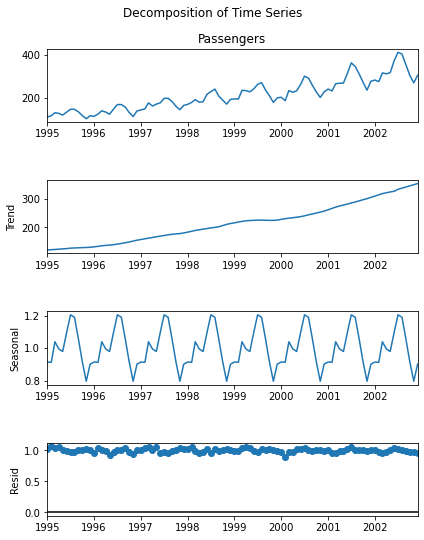

In [19]:
fig = decompose.plot()
fig.set_figheight(8)
fig.set_figwidth(6)
fig.suptitle('Decomposition of Time Series')

- It is clearly evident that there is an overall increasing trend in the data along with some seasonal variations. However, it might not always be possible to make such visual inferences.
- we can check stationarity by Plotting Rolling Statistics
- We can plot the moving average or moving variance and see if it varies with time.
- By moving average/variance we mean that at any instant 't', we'll take the average/variance of the last year, i.e. last 12 months. But again this is more of a visual technique.
- Now, let’s try to remove wrinkles from our time series using moving average. We will take moving average of different time periods i.e. 4,6,8, and 12 months as shown below. Here, moving average is shown in orange and actual series in blue.


# Moving Average Extra Info

- The hope of smoothing is to remove noise and better expose the signal of the underlying causal processes.
- Calculating a moving average involves creating a new series where the values are comprised of the average of raw observations in the original time series.
- A moving average requires that you specify a window size called the window width. This defines the number of raw observations used to calculate the moving average value.
- The “moving” part in the moving average refers to the fact that the window defined by the window width is slid along the time series to calculate the average values in the new series.
- There are two main types of moving average that are used: Centered and Trailing Moving Average.
- Trailing moving average only uses historical observations and is used on time series forecasting.
- A center moving average can be used as a general method to remove trend and seasonal components from a time series.


# Rolling Statistics

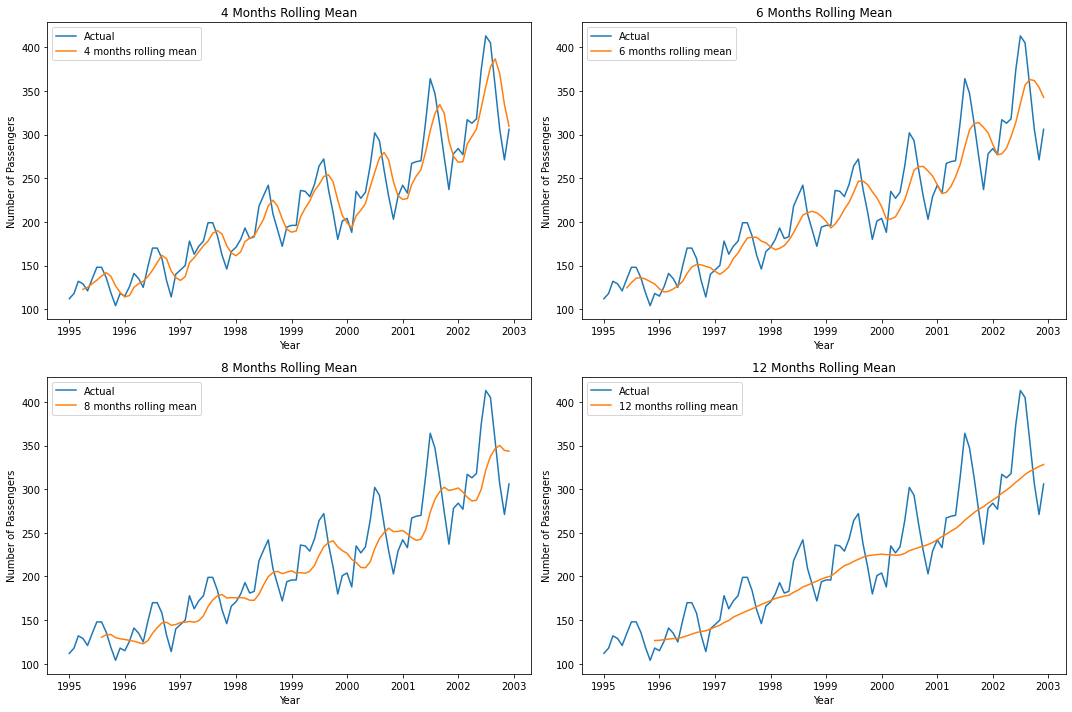

In [20]:
fig,axes = plt.subplots(2,2)
fig.set_figheight(10)
fig.set_figwidth(15)
axes[0][0].plot(ddf.index,passengers_count,label='Actual')
axes[0][0].plot(ddf.index,passengers_count.rolling(window=4).mean(),label='4 months rolling mean')
axes[0][0].set_xlabel('Year')
axes[0][0].set_ylabel('Number of Passengers')
axes[0][0].set_title('4 Months Rolling Mean')
axes[0][0].legend(loc='best')


axes[0][1].plot(ddf.index,passengers_count,label='Actual')
axes[0][1].plot(ddf.index,passengers_count.rolling(window=6).mean(),label='6 months rolling mean')
axes[0][1].set_xlabel('Year')
axes[0][1].set_ylabel('Number of Passengers')
axes[0][1].set_title('6 Months Rolling Mean')
axes[0][1].legend(loc='best')


axes[1][0].plot(ddf.index,passengers_count,label='Actual')
axes[1][0].plot(ddf.index,passengers_count.rolling(window=8).mean(),label='8 months rolling mean')
axes[1][0].set_xlabel('Year')
axes[1][0].set_ylabel('Number of Passengers')
axes[1][0].set_title('8 Months Rolling Mean')
axes[1][0].legend(loc='best')

axes[1][1].plot(ddf.index,passengers_count,label='Actual')
axes[1][1].plot(ddf.index,passengers_count.rolling(window=12).mean(),label='12 months rolling mean')
axes[1][1].set_xlabel('Year')
axes[1][1].set_ylabel('Number of Passengers')
axes[1][1].set_title('12 Months Rolling Mean')
axes[1][1].legend(loc='best')

plt.tight_layout()
plt.show()


- As we could see in the above plots, 12-month moving average could produce a wrinkle free curve as desired. This on some level is expected since we are using month-wise data for our analysis and there is expected monthly-seasonal effect in our data.

 Seasonality

- Let us see how many passengers travelled in flights on a month on month basis. We will plot a stacked annual plot to observe seasonality in our data.

In [21]:
monthly = pd.pivot_table(data=ddf,values='Passengers',index='Month',columns='Year')
monthly = monthly.reindex(index=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
monthly

Year,1995,1996,1997,1998,1999,2000,2001,2002
Month,,,,,,,,
Jan,112,115,145,171,196,204,242,284
Feb,118,126,150,180,196,188,233,277
Mar,132,141,178,193,236,235,267,317
Apr,129,135,163,181,235,227,269,313
May,121,125,172,183,229,234,270,318
Jun,135,149,178,218,243,264,315,374
Jul,148,170,199,230,264,302,364,413
Aug,148,170,199,242,272,293,347,405
Sep,136,158,184,209,237,259,312,355


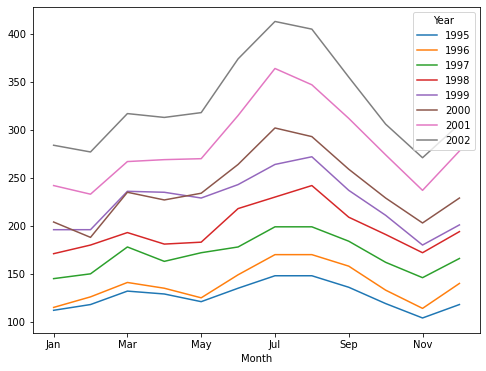

In [22]:
#monthly passengers

monthly.plot(figsize=(8,6))
plt.show()

In [23]:
#plotting passengers yearly
yearly = pd.pivot_table(data=ddf,values='Passengers',index='Year',columns='Month')
yearly = yearly[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]
yearly

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1995,112,118,132,129,121,135,148,148,136,119,104,118
1996,115,126,141,135,125,149,170,170,158,133,114,140
1997,145,150,178,163,172,178,199,199,184,162,146,166
1998,171,180,193,181,183,218,230,242,209,191,172,194
1999,196,196,236,235,229,243,264,272,237,211,180,201
2000,204,188,235,227,234,264,302,293,259,229,203,229
2001,242,233,267,269,270,315,364,347,312,274,237,278
2002,284,277,317,313,318,374,413,405,355,306,271,306


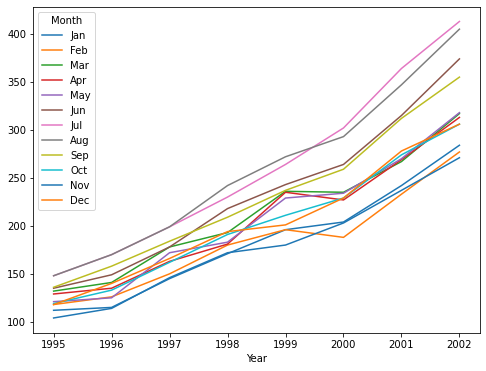

In [24]:
#plotting passengers yearly
yearly.plot(figsize=(8,6))
plt.show()

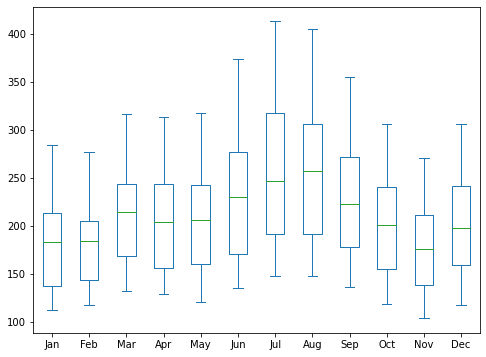

In [25]:
yearly.plot(kind='box',figsize=(8,6))
plt.show()

# Important Inferences
- The passengers are increasing without fail every year.
- July and August are the peak months for passengers.
- We can see a seasonal cycle of 12 months where the mean value of each month starts with a increasing trend in the beginning of the year and drops down towards the end of the year. We can see a seasonal effect with a cycle of 12 months.

# Transformation

In [26]:
from numpy import sqrt
from pandas import DataFrame

In [27]:
ddf.head()

,Month,Year,Passengers
Date,,,
1995-01-01,Jan,1995,112
1995-02-01,Feb,1995,118
1995-03-01,Mar,1995,132
1995-04-01,Apr,1995,129
1995-05-01,May,1995,121


In [28]:
df1 = ddf.drop(['Month', 'Year'], axis=1)
df1.head()

,Passengers
Date,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


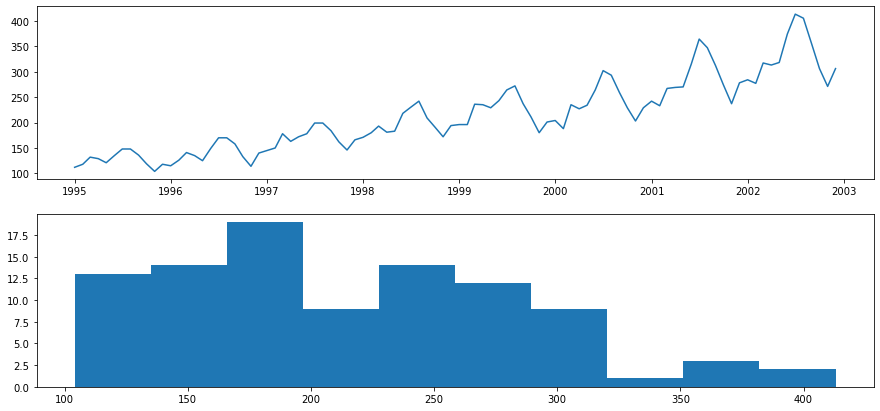

In [29]:
# Plot before transformation
plt.figure(figsize=(15,7))
# line plot
plt.subplot(211)
plt.plot(df1)
# histogram
plt.subplot(212)
plt.hist(df1)
plt.show()

# Square Root Transform

In [30]:
dataframe = DataFrame(df1.values)
dataframe.columns = ['Passengers']
dataframe['Passengers'] = sqrt(dataframe['Passengers'])

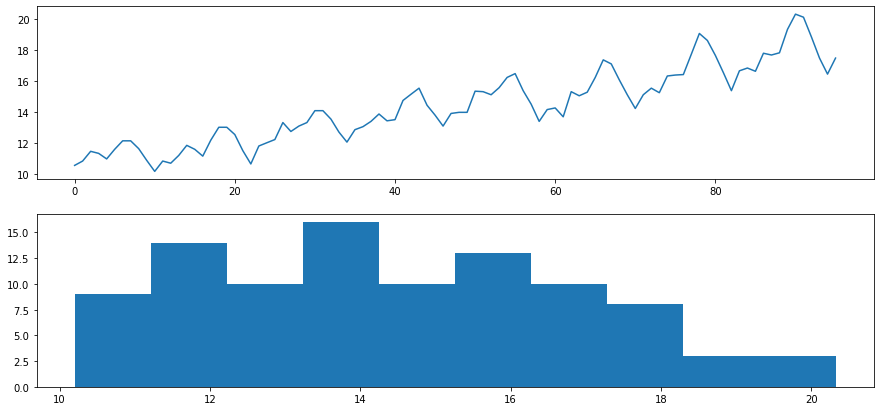

In [31]:
plt.figure(figsize=(15,7))
# line plot
plt.subplot(211)
plt.plot(dataframe['Passengers'])
# histogram
plt.subplot(212)
plt.hist(dataframe['Passengers'])
plt.show()

# Log Transform

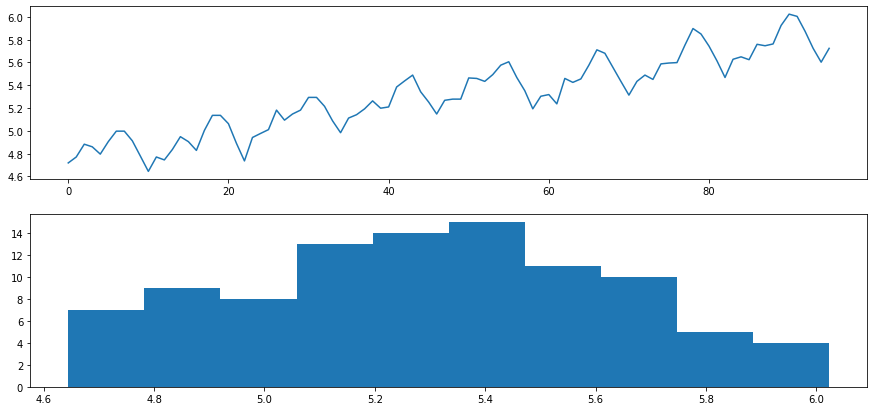

In [32]:
from numpy import log
dataframe = DataFrame(df1.values)
dataframe.columns = ['Passengers']
dataframe['Passengers'] = log(dataframe['Passengers'])

plt.figure(figsize=(15,7))
# line plot
plt.subplot(211)
plt.plot(dataframe['Passengers'])
# histogram
plt.subplot(212)
plt.hist(dataframe['Passengers'])
plt.show()

The distribution is better with log tranformation so we will use log_transformation in our mode

In [33]:
df.head()

,Month,Year,Passengers
Date,,,
1995-01-01,Jan,1995,112
1995-02-01,Feb,1995,118
1995-03-01,Mar,1995,132
1995-04-01,Apr,1995,129
1995-05-01,May,1995,121


# Getting t, t_squared, log_passengers Transformation

In [34]:
dfr=df.reset_index(drop=True)
dfr

,Month,Year,Passengers
0,Jan,1995,112
1,Feb,1995,118
2,Mar,1995,132
3,Apr,1995,129
4,May,1995,121
...,...,...,...
91,Aug,2002,405
92,Sep,2002,355
93,Oct,2002,306
94,Nov,2002,271


In [35]:
month_dummies = pd.DataFrame(pd.get_dummies(dfr['Month']))

In [36]:
Air = pd.concat([dfr,month_dummies],axis = 1)

In [37]:
Air["t"] = np.arange(1,97) #time #total rows 97

In [38]:
Air["t_sq"] = Air["t"]*Air["t"] #t_squared value

In [39]:
Air["log_Passengers"] = np.log(Air["Passengers"])

In [40]:
Air.head()

,Month,Year,Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_sq,log_Passengers
0,Jan,1995,112,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,Feb,1995,118,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,Mar,1995,132,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,Apr,1995,129,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,May,1995,121,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791


# Model based methods

In [41]:
#splitting
Train = Air.head(77)
Test = Air.tail(19)

In [42]:
# Linear Model
import statsmodels.formula.api as smf
linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear = pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

58.14854431950882

In [43]:
#Exponential
Exp = smf.ols('log_Passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

47.88965425184036

In [44]:
# Quadratic
Quad = smf.ols('Passengers~t+t_sq',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_sq"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

58.926328528188264

In [45]:
# Additive seasonality
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

133.3154036011272

In [46]:
# Additive Seasonality Quadratic

add_sea_Quad = smf.ols('Passengers~t+t_sq+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_sq']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

39.61752923079039

In [47]:
# Multiplicative Seasonality
Mul_sea = smf.ols('log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

138.7571524741709

In [48]:
# Multiplicative Additive Seasonality
Mul_Add_sea = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

12.183266271786405

# Values For All The Model Based Methods

In [49]:
#Creating dataframe of all model rmse values
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,12.183266
4,rmse_add_sea_quad,39.617529
1,rmse_Exp,47.889654
0,rmse_linear,58.148544
2,rmse_Quad,58.926329
3,rmse_add_sea,133.315404
5,rmse_Mult_sea,138.757152


# Multiplicative additive seasonality has the least rmse value

In [50]:
#predicting on complete dataset
model_full = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Air).fit()
#Mul_Add_sea = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+',data = Train).fit()
pred_Model_full = pd.Series(model_full.predict(Air))
rmse_model_full = np.sqrt(np.mean((np.array(Air['Passengers'])-np.array(np.exp(pred_Model_full)))**2))
rmse_model_full

8.933548467712585

In [51]:
#prediction on the complete dataset since we don't have any new data for predicting
pred_Model_full = pd.Series(model_full.predict(Air))
pred_Model_full

0     4.692963
1     4.703487
2     4.846666
3     4.813814
4     4.807291
        ...   
91    5.978339
92    5.868100
93    5.737989
94    5.607538
95    5.744085
Length: 96, dtype: float64

# Multiplicative additive seasonality with complete model has the lowest rmse value

# Data Driven Approaches

In [52]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from datetime import datetime,time
import statsmodels.graphics.tsaplots as tsa_plots
import seaborn as sn
import statsmodels.api as smf

In [53]:
#MAPE
def MAPE(pred,org):
    temp=np.abs((pred-org))*100/org
    return np.mean(temp) 

In [54]:
Exp=SimpleExpSmoothing(Train["Passengers"]).fit()
Exp_pred=Exp.predict(start=Test.index[0],end=Test.index[-1])
Exp_mape=MAPE(Exp_pred,Test.Passengers)
Exp_mape

15.197175688783663

In [55]:
# Holt method
hw=Holt(Train["Passengers"]).fit()
hw_pred=hw.predict(start=Test.index[0],end=Test.index[-1])
hw_mape=MAPE(hw_pred,Test.Passengers)
hw_mape

11.795704355659181

In [56]:
# Holts winter exponential smoothing with **additive seasonality and additive trend
Exp_add_add=ExponentialSmoothing(Train["Passengers"],damped=True,seasonal="add",trend="add",seasonal_periods=12).fit()
Exp_add_add_pred=Exp_add_add.predict(start=Test.index[0],end=Test.index[-1])
Exp_add_add_Mape=MAPE(Exp_add_add_pred,Test.Passengers)
Exp_add_add_Mape

9.482191531855918

In [57]:
# Holts winter Exponential smoothing with **Multiplicative trend and additive seasonality**
Exp_mul_add=ExponentialSmoothing(Train["Passengers"],damped=True,seasonal="mul",trend="add",seasonal_periods=12).fit()
Exp_mul_add_pred=Exp_mul_add.predict(start=Test.index[0],end=Test.index[-1])
Exp_mul_add_mape=MAPE(Exp_mul_add_pred,Test.Passengers)######4.49
Exp_mul_add_mape

9.944164690496976

# Values for all the Data-Driven models

In [58]:
Table={"Model":pd.Series(["Exp_mape","hw_mape","Exp_add_add_Mape","Exp_mul_add_mape"]),"MAPE_VAlUES":pd.Series([Exp_mape,hw_mape,Exp_add_add_Mape,Exp_mul_add_mape])}
Table=pd.DataFrame(Table)
Table.sort_values(['MAPE_VAlUES'])

,Model,MAPE_VAlUES
2,Exp_add_add_Mape,9.482192
3,Exp_mul_add_mape,9.944165
1,hw_mape,11.795704
0,Exp_mape,15.197176


# Exponentital Multiplicative tend with Additive seasonality has the least rmse score.

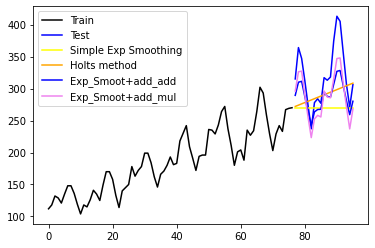

In [59]:
# Visualization of Forecasted values for Test data set using different methods
plt.plot(Train.index,Train["Passengers"],label="Train",color="black")
plt.plot(Test.index,Test["Passengers"],label="Test",color="blue")
plt.plot(Exp_pred.index,Exp_pred,label="Simple Exp Smoothing",color="yellow")
plt.plot(hw_pred.index,hw_pred,label="Holts method",color="orange")
plt.plot(Exp_add_add_pred.index,Exp_add_add_pred,label="Exp_Smoot+add_add",color="blue")
plt.plot(Exp_mul_add_pred.index,Exp_mul_add_pred,label="Exp_Smoot+add_mul",color="violet")
plt.legend(loc='best')

# Final model adding Train and Test

In [60]:
# Holts winter Exponential smoothing with **Multiplicative trend and additive seasonality**
# Complete dataset
Exp_mul_add_full=ExponentialSmoothing(Air["Passengers"],damped=True,seasonal="mul",trend="add",seasonal_periods=12).fit()
Exp_mul_add_full_pred=Exp_mul_add_full.predict(start=Air.index[0],end=Air.index[-1])
Exp_mul_add_full_mape=MAPE(Exp_mul_add_full_pred,Air.Passengers)
Exp_mul_add_full_mape

2.7785333770140004

In [61]:
#forecast for next 10 time periods
Exp_mul_add_full.forecast(10)

96     311.934464
97     306.499889
98     352.902930
99     342.515619
100    341.775666
101    387.417532
102    430.277307
103    423.126652
104    373.620652
105    325.974961
dtype: float64

# ARIMA Model

In [62]:
#preparing for Arima
df2 = df1.iloc[:,0:1]
df2

,Passengers
Date,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


# Separate out a validation dataset

In [63]:
split_point = len(df2) - 10
dataset, validation = df2[0:split_point], df2[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Dataset 86, Validation 10


# Persistence/ Base model

In [64]:
# evaluate a persistence model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt

# load data
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)

# prepare data
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

In [65]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=230.000, Expected=242.000
>Predicted=242.000, Expected=209.000
>Predicted=209.000, Expected=191.000
>Predicted=191.000, Expected=172.000
>Predicted=172.000, Expected=194.000
>Predicted=194.000, Expected=196.000
>Predicted=196.000, Expected=196.000
>Predicted=196.000, Expected=236.000
>Predicted=236.000, Expected=235.000
>Predicted=235.000, Expected=229.000
>Predicted=229.000, Expected=243.000
>Predicted=243.000, Expected=264.000
>Predicted=264.000, Expected=272.000
>Predicted=272.000, Expected=237.000
>Predicted=237.000, Expected=211.000
>Predicted=211.000, Expected=180.000
>Predicted=180.000, Expected=201.000
>Predicted=201.000, Expected=204.000
>Predicted=204.000, Expected=188.000
>Predicted=188.000, Expected=235.000
>Predicted=235.000, Expected=227.000
>Predicted=227.000, Expected=234.000
>Predicted=234.000, Expected=264.000
>Predicted=264.000, Expected=302.000
>Predicted=302.000, Expected=293.000
>Predicted=293.000, Expected=259.000
>Predicted=259.000, Expected=229.000
>

# ARIMA Hyperparameters

In [66]:
# grid search ARIMA parameters for a time series
import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
   
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)

# model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])

# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse


# Grid search for p,d,q values

In [67]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))


In [68]:
# load dataset
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
#evaluate parameters
p_values = range(0, 5)
d_values = range(0, 5)
q_values = range(0, 5)
warnings.filterwarnings("ignore")
evaluate_models(train.values, p_values, d_values, q_values)

Best ARIMANone RMSE=inf


- P = 0 #AR
- d = 1 #differentiation
- q = 4 #MA

These are the best parameters for our Arima model

# Building model based on the optimized values

In [69]:
# save finalized model to file
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import numpy

# load data
train = read_csv('dataset.csv', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

# fit model
model = ARIMA(X, order=(0,1,4))
model_fit = model.fit()
forecast=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(1, 96)


NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [ ]:
# Error on the test data
val=pd.read_csv('validation.csv',header=None)
rmse = sqrt(mean_squared_error(val[1], forecast))
rmse

ARIMA model has the highest rmse score 60%.

# Combining train and test data to build final model

In [ ]:
# fit model
wdf = pd.read_excel(r'C:\Users\Saqlain\Downloads\Airlines+Data.xlsx',header=0, index_col=0, parse_dates=True)
wdf.head()

In [ ]:
#Converting the 'Month' column into proper date time format
dates = pd.date_range(start='1949-01-01', freq='MS',periods=len(wdf))

In [ ]:
wdf['Date'] = dates
wdf.set_index('Date',inplace=True)

In [ ]:
# prepare data
X = wdf.values
X = X.astype('float32')

In [ ]:
#model fitting
model = ARIMA(X, order=(0,1,4))
model_fit = model.fit()

In [ ]:
#prediction
forecast=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(1,96)

In [ ]:
forecast

# Insight:
- The dataset was normaly distributed with log transformation.
- In model based approaches Multiplicative additive seasionality gave the least rmse scores
- In Data driven approaches Holts winter Exponential smoothing with Multiplicative trend and additive seasonality gave the least rmse score.
- With ARIMA model we had the highest rmse score.